In [16]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [18]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [19]:
mpg = mpg.dropna()
X=mpg[['acceleration','weight']].values.reshape(-1,2)
#X=mpg[['acceleration','weight']].values
y=mpg[['mpg']].values.reshape(-1,1)

#print(X)
#print(y)

Text(0, 0.5, 'MPG')

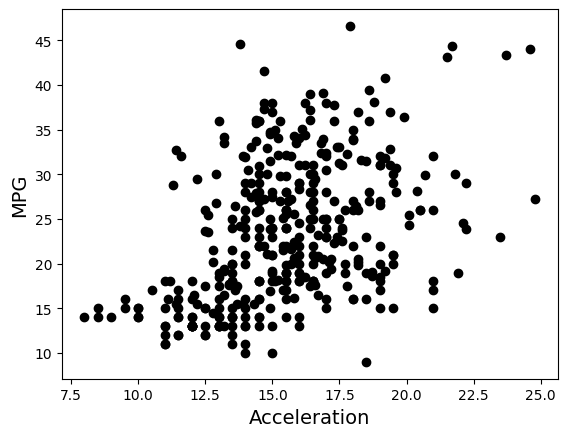

In [20]:
# Graph acceleration vs MPG
plt.scatter(X[:, 0], y, color='black')
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('MPG', fontsize=14)

Text(0, 0.5, 'MPG')

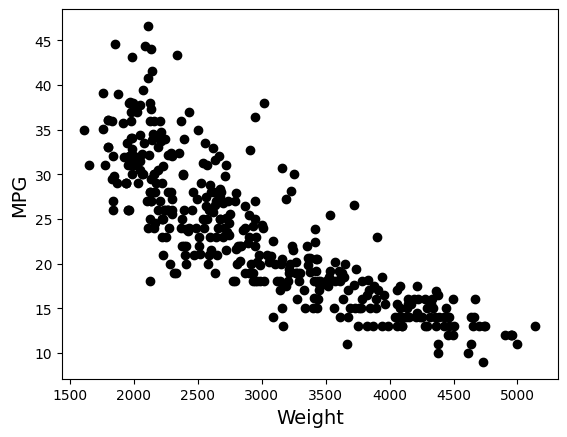

In [21]:
# Graph weight vs MPG
plt.scatter(X[:, 1], y, color='black')
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)


In [22]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted MPG = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Acceleration)",
    " + ",
    linModel.coef_[0][1],
    "* (Weight)",
)

Predicted MPG =  41.095328779604245  +  0.26165039648878763 * (Acceleration)  +  -0.0072930951138257165 * (Weight)


(28.0, 9.0)

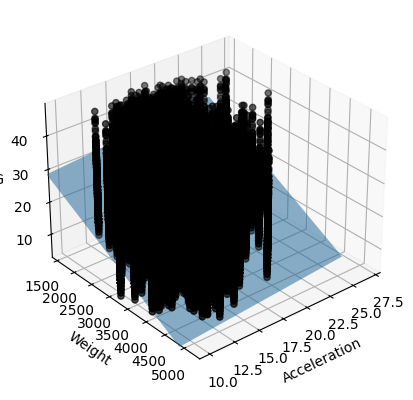

In [23]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(X[:, 0], X[:, 1], y, color="Black")
# Plot the regression as a plane
xDeltaAccel, xDeltaWeight = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 2),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 2),
)
yDeltaMPG = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaAccel
    + linModel.coef_[0][1] * xDeltaWeight
)
ax.plot_surface(xDeltaAccel, xDeltaWeight, yDeltaMPG, alpha=0.5)
# Axes labels
ax.set_xlabel('Acceleration')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
# Set the view angle
ax.view_init(30, 50)
ax.set_xlim(28, 9)

In [24]:
 #Make a prediction
yMultyPredicted = linModel.predict([[20, 3000]])
print(yMultyPredicted)
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "miles per gallon",
)

[[24.44905137]]
Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the multiple linear regression is  24.449051367902847 miles per gallon


Predicted MPG =  62.25547397329214  +  -0.018495610572078984 * (Weight)  +  1.6965650653725319e-06 * (Weight)^2


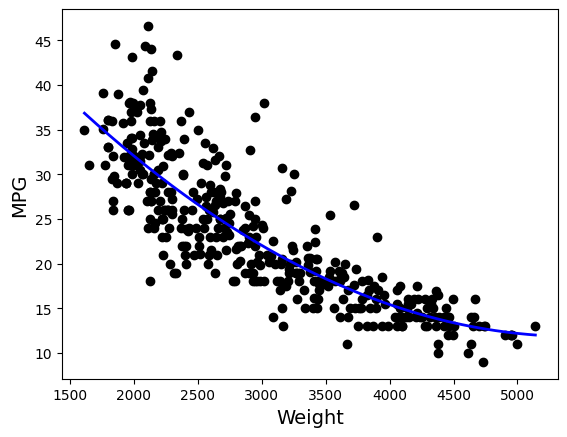

In [25]:
# Store weight as an array
X2 = X[:, 1].reshape(-1, 1)

# Fit a quadratic regression model using just Weight
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X2)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

# Graph the quadratic regression
plt.scatter(X2, y, color='black')
xDelta = np.linspace(X2.min(), X2.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

# Write the quadratic model as an equation
print(
    "Predicted MPG = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Weight)",
    " + ",
    polyModel.coef_[0][1],
    "* (Weight)^2",
)

In [26]:
# Make a prediction
polyInputs = polyFeatures.transform([[3000]])
yPolyPredicted = polyModel.predict(polyInputs)
print(
    "Predicted MPG for a car with Weight = 3000 pounds \n",
    "using the simple polynomial regression is ", yPolyPredicted[0][0], "miles per gallon",
)

Predicted MPG for a car with Weight = 3000 pounds 
 using the simple polynomial regression is  22.03772784540798 miles per gallon


In [27]:
# Fit a quadratic regression model using acceleration and weight
polyFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
xPoly2 = polyFeatures2.fit_transform(X)
polyModel2 = LinearRegression()
polyModel2.fit(xPoly2, y)

# Write the quadratic regression as an equation
print(
    "Predicted MPG =", polyModel2.intercept_[0], "\n",
    " + ", polyModel2.coef_[0][0], "* (Acceleration)\n",
    " + ", polyModel2.coef_[0][1], "* (Weight)", "\n",
    " + ", polyModel2.coef_[0][2], "* (Acceleration)^2 \n",
    " + ", polyModel2.coef_[0][3], "* (Acceleration)*(Weight) \n",
    " + ", polyModel2.coef_[0][4], "* (Weight)^2 \n",
)

Predicted MPG = 78.31768655351065 
  +  -1.6282643136257229 * (Acceleration)
  +  -0.022634642648894015 * (Weight) 
  +  0.045613892468737406 * (Acceleration)^2 
  +  0.00015544962680953084 * (Acceleration)*(Weight) 
  +  2.0264199567070207e-06 * (Weight)^2 



In [28]:
# Make a prediction
polyInputs2 = polyFeatures2.transform([[20, 3000]])
yPolyPredicted2 = polyModel2.predict(polyInputs2)
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the polynomial regression is ", yPolyPredicted2[0][0], "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the polynomial regression is  23.65878654074416 miles per gallon
